In [1]:
from tscausalinference import tscausalinference as tsci
from tscausalinference import sensitivity
from tscausalinference import synth_dataframe

import pandas as pd
import numpy as np

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('/workspaces/marketing-science-projects/tscausalinference/introduction_notebooks/data/example_data.csv')
df['ds'] = pd.to_datetime(df.ds)

In [ ]:
# grid = {'changepoint_prior_scale': [0.01, 0.05],
#               'seasonality_prior_scale': [0.01, 0.03, 0.05],
#               'weekly_seasonality': [True, False], 
#               'seasonality_mode': ['additive', 'multiplicative'],
#               'yearly_seasonality': [False], 'changepoint_range': [0.85, 0.50]}

grid = {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.05, 'weekly_seasonality': True, 
        'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'changepoint_range': 0.85, 'interval_width': 0.95}
#Use greater grids to find the best models.

sensitivity_analysis = sensitivity(
    df = df[df.ds < pd.to_datetime('2022-10-03')], 
    test_period = ['2022-09-15', '2022-09-25'], 
    cross_validation_steps = 10, 
    alpha = 0.05, 
    model_params = grid, 
    regressors = ['salford','bolton','oldham','rochdale','trafford','stockport','tameside'],
    verbose = True,
    autocorrelation = True,
    n_samples = 5000)

sensitivity_analysis.run(prior=True)

Training period: 2022-04-13 00:00:00 to 2022-09-14
Test period: 2022-09-15 to 2022-09-25

Post period: 2022-09-26 to 2022-10-02 00:00:00

Prediction horizon: 11 days
Custom parameters grid: 
{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.05, 'weekly_seasonality': True, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'changepoint_range': 0.85, 'interval_width': 0.95}


100%|██████████| 23/23 [00:05<00:00,  4.52it/s]



Cross-validation MAPE: 10.47%

Seasons detected: ['weekly']
+----+-------------+------------------+----------+---------------+--------------+---------------+
|    | Regressor   | Regressor Mode   |   Center |   Coef. Lower |         Coef |   Coef. Upper |
+====+=============+==================+==========+===============+==============+===============+
|  0 | salford     | multiplicative   | 124.406  |   0.00551413  |  0.00551413  |   0.00551413  |
+----+-------------+------------------+----------+---------------+--------------+---------------+
|  1 | bolton      | multiplicative   |  28.929  |   3.3999e-05  |  3.3999e-05  |   3.3999e-05  |
+----+-------------+------------------+----------+---------------+--------------+---------------+
|  2 | oldham      | multiplicative   |  49.3613 |   0.000168314 |  0.000168314 |   0.000168314 |
+----+-------------+------------------+----------+---------------+--------------+---------------+
|  3 | rochdale    | multiplicative   |  26.2903 |   0.00

In [ ]:
mde = sensitivity_analysis.data_analysis()
mde.tail(5)

,model,pvalue,train,test,ci_lower,ci_upper,ci_mean,y_pred_period,y_test_period,y_pred_period_mean,y_test_period_mean,y_last90days_mean,y_historical_mean
injected_effect,,,,,,,,,,,,,
1.84,"{'changepoint_prior_scale': 0.01, 'seasonality...",0.0,"[[r2, 0.9579559807707569], [MAE, 38.9399074963...","[[r2, 0.64378882002737], [MAE, 110.49565822651...",7920.749708,12629.252775,"[948.4141388587603, 948.4141388587606]",10150.390876,20620.424490,922.762807,1874.584045,655.393258,525.980519
1.88,"{'changepoint_prior_scale': 0.01, 'seasonality...",0.0,"[[r2, 0.9579559807707569], [MAE, 38.9399074963...","[[r2, 0.64378882002737], [MAE, 110.49565822651...",7920.749708,12629.252775,"[948.4141388587603, 948.4141388587606]",10150.390876,21053.818367,922.762807,1913.983488,655.393258,525.980519
1.92,"{'changepoint_prior_scale': 0.01, 'seasonality...",0.0,"[[r2, 0.9579559807707569], [MAE, 38.9399074963...","[[r2, 0.64378882002737], [MAE, 110.49565822651...",7920.749708,12629.252775,"[948.4141388587603, 948.4141388587606]",10150.390876,21487.212245,922.762807,1953.382931,655.393258,525.980519
1.96,"{'changepoint_prior_scale': 0.01, 'seasonality...",0.0,"[[r2, 0.9579559807707569], [MAE, 38.9399074963...","[[r2, 0.64378882002737], [MAE, 110.49565822651...",7920.749708,12629.252775,"[948.4141388587603, 948.4141388587606]",10150.390876,21920.606122,922.762807,1992.782375,655.393258,525.980519
2.00,"{'changepoint_prior_scale': 0.01, 'seasonality...",0.0,"[[r2, 0.9579559807707569], [MAE, 38.9399074963...","[[r2, 0.64378882002737], [MAE, 110.49565822651...",7920.749708,12629.252775,"[948.4141388587603, 948.4141388587606]",10150.390876,22354.000000,922.762807,2032.181818,655.393258,525.980519


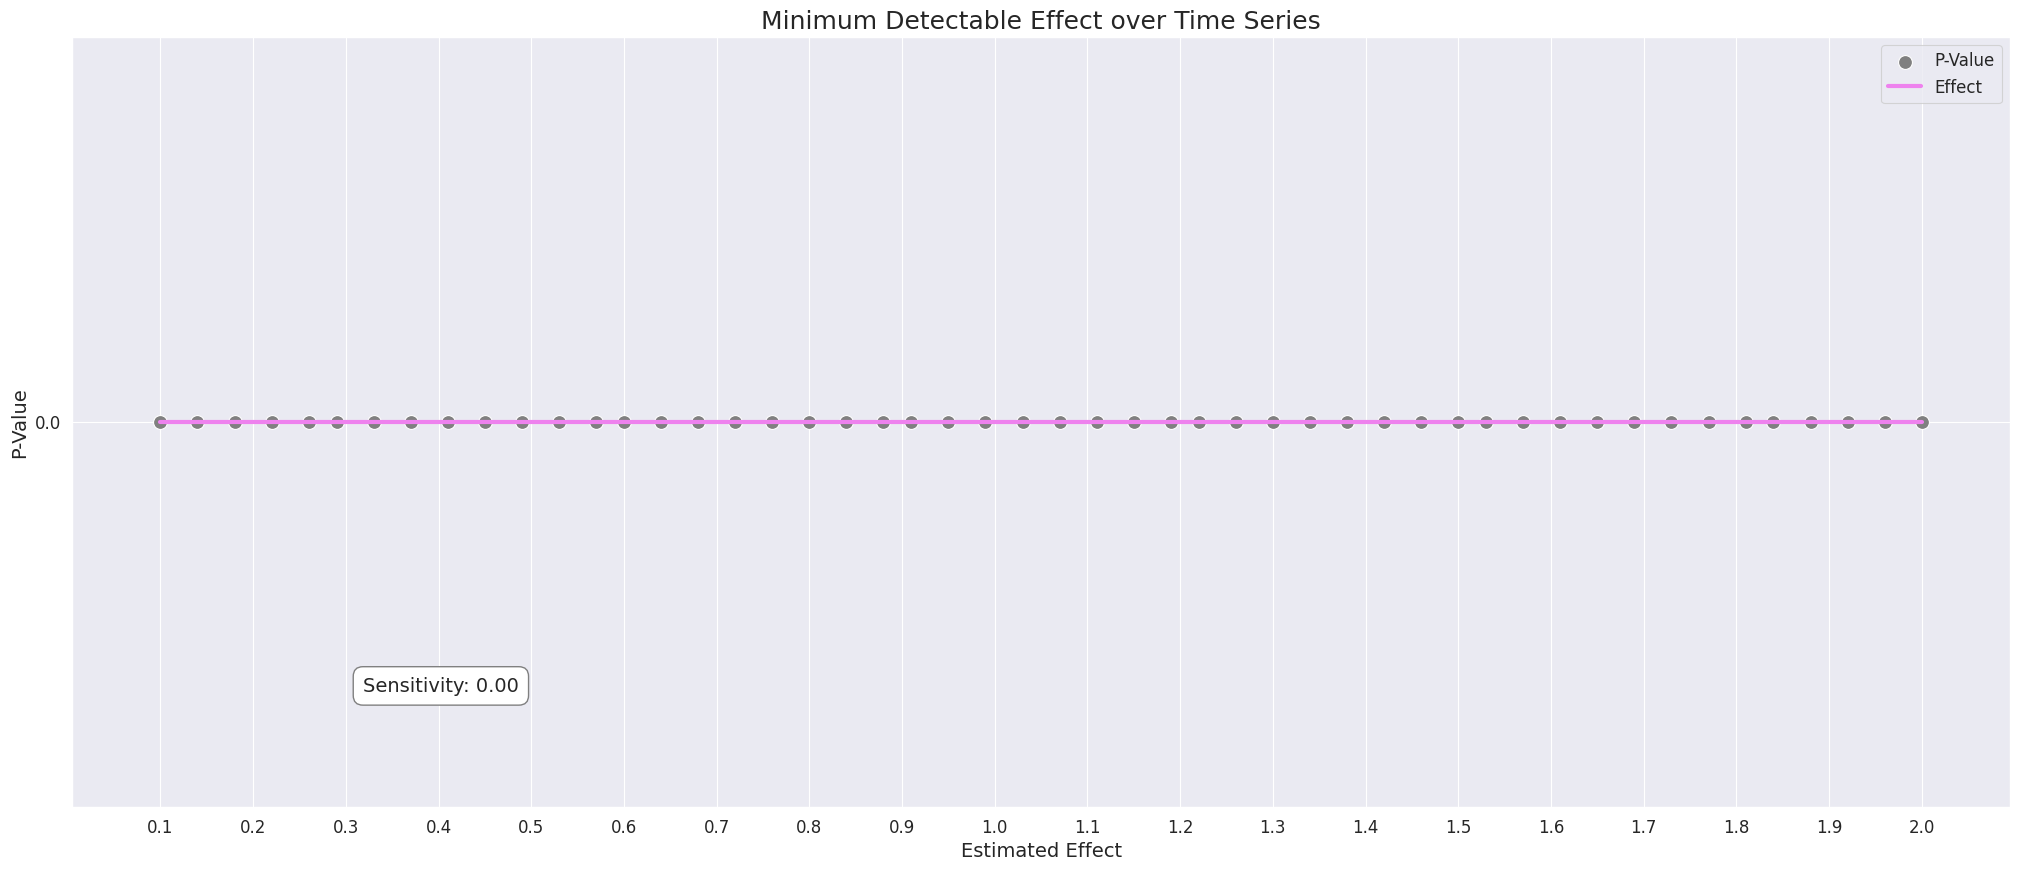

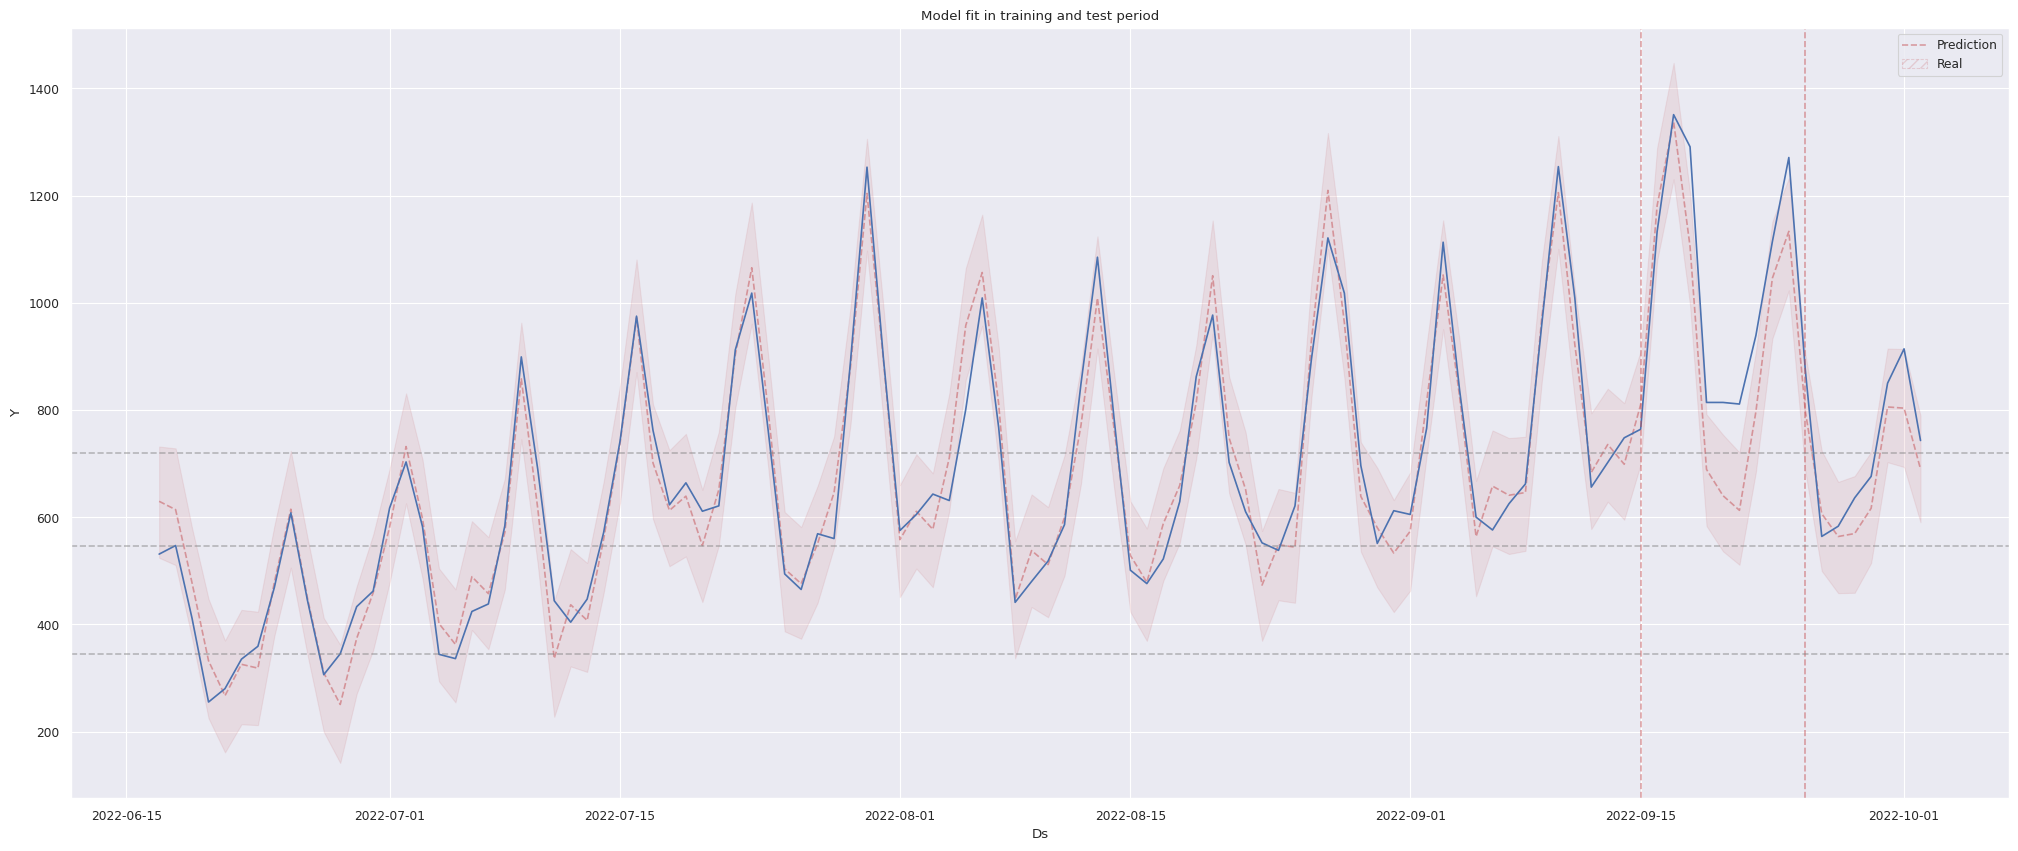

In [ ]:
sensitivity_analysis.plot()
sensitivity_analysis.plot(method = 'training', back_window=90)

In [ ]:
intervention = ['2022-10-03','2022-10-20']

model = tsci(
    data = df,
    intervention = intervention, 
    n_samples = 5000, 
    regressors = ['salford','bolton','oldham','rochdale','trafford','stockport','tameside'], 
    model_params = sensitivity_analysis.model_best_parameters(),
    autocorrelation = True,
    cross_validation_steps = 15,
    model_type='gam'
    )
model.run(prior=True)

Training period: 2022-04-13 00:00:00 to 2022-10-02
Test period: 2022-10-03 to 2022-10-20

Post period: 2022-10-21 to 2023-03-15 00:00:00

Prediction horizon: 18 days
Custom parameters grid: 
{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.05, 'weekly_seasonality': True, 'seasonality_mode': 'multiplicative', 'yearly_seasonality': False, 'changepoint_range': 0.85, 'interval_width': 0.95}


100%|██████████| 15/15 [00:02<00:00,  5.19it/s]



Cross-validation MAPE: 9.10%

Seasons detected: ['weekly']
+----+-------------+------------------+----------+---------------+--------------+---------------+
|    | Regressor   | Regressor Mode   |   Center |   Coef. Lower |         Coef |   Coef. Upper |
+====+=============+==================+==========+===============+==============+===============+
|  0 | salford     | multiplicative   | 132.491  |   0.00462113  |  0.00462113  |   0.00462113  |
+----+-------------+------------------+----------+---------------+--------------+---------------+
|  1 | bolton      | multiplicative   |  31.8671 |  -0.000152766 | -0.000152766 |  -0.000152766 |
+----+-------------+------------------+----------+---------------+--------------+---------------+
|  2 | oldham      | multiplicative   |  52.6416 |   0.00228443  |  0.00228443  |   0.00228443  |
+----+-------------+------------------+----------+---------------+--------------+---------------+
|  3 | rochdale    | multiplicative   |  28.7861 |  -0.002

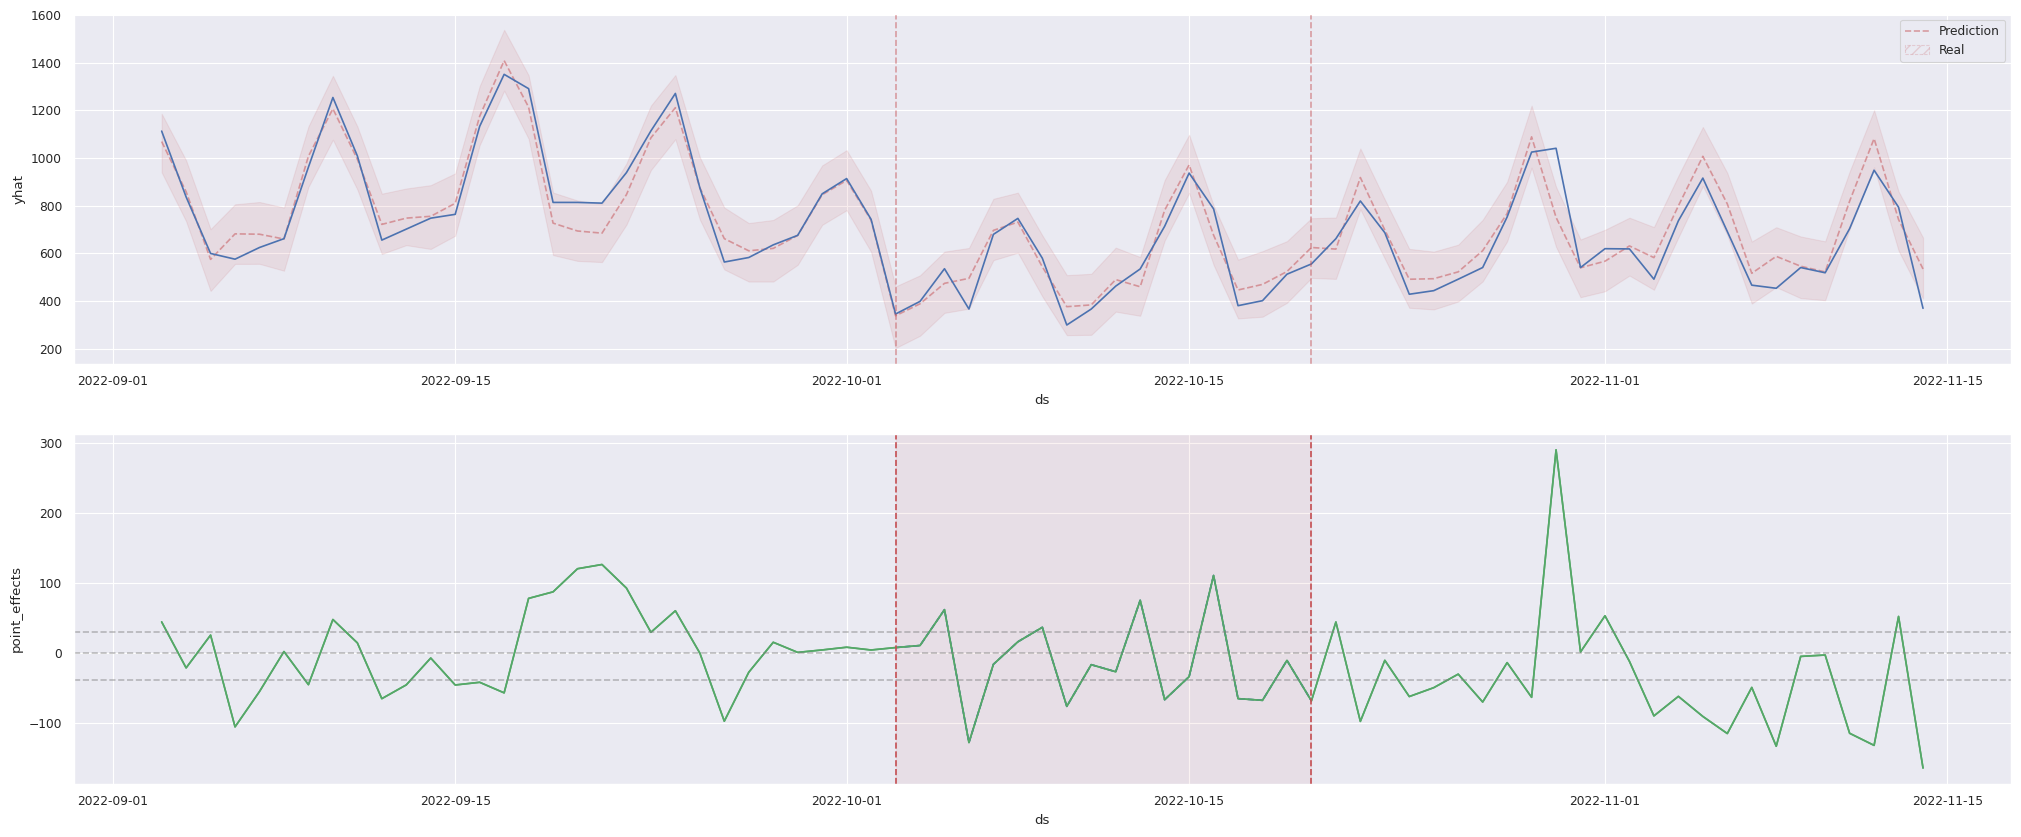

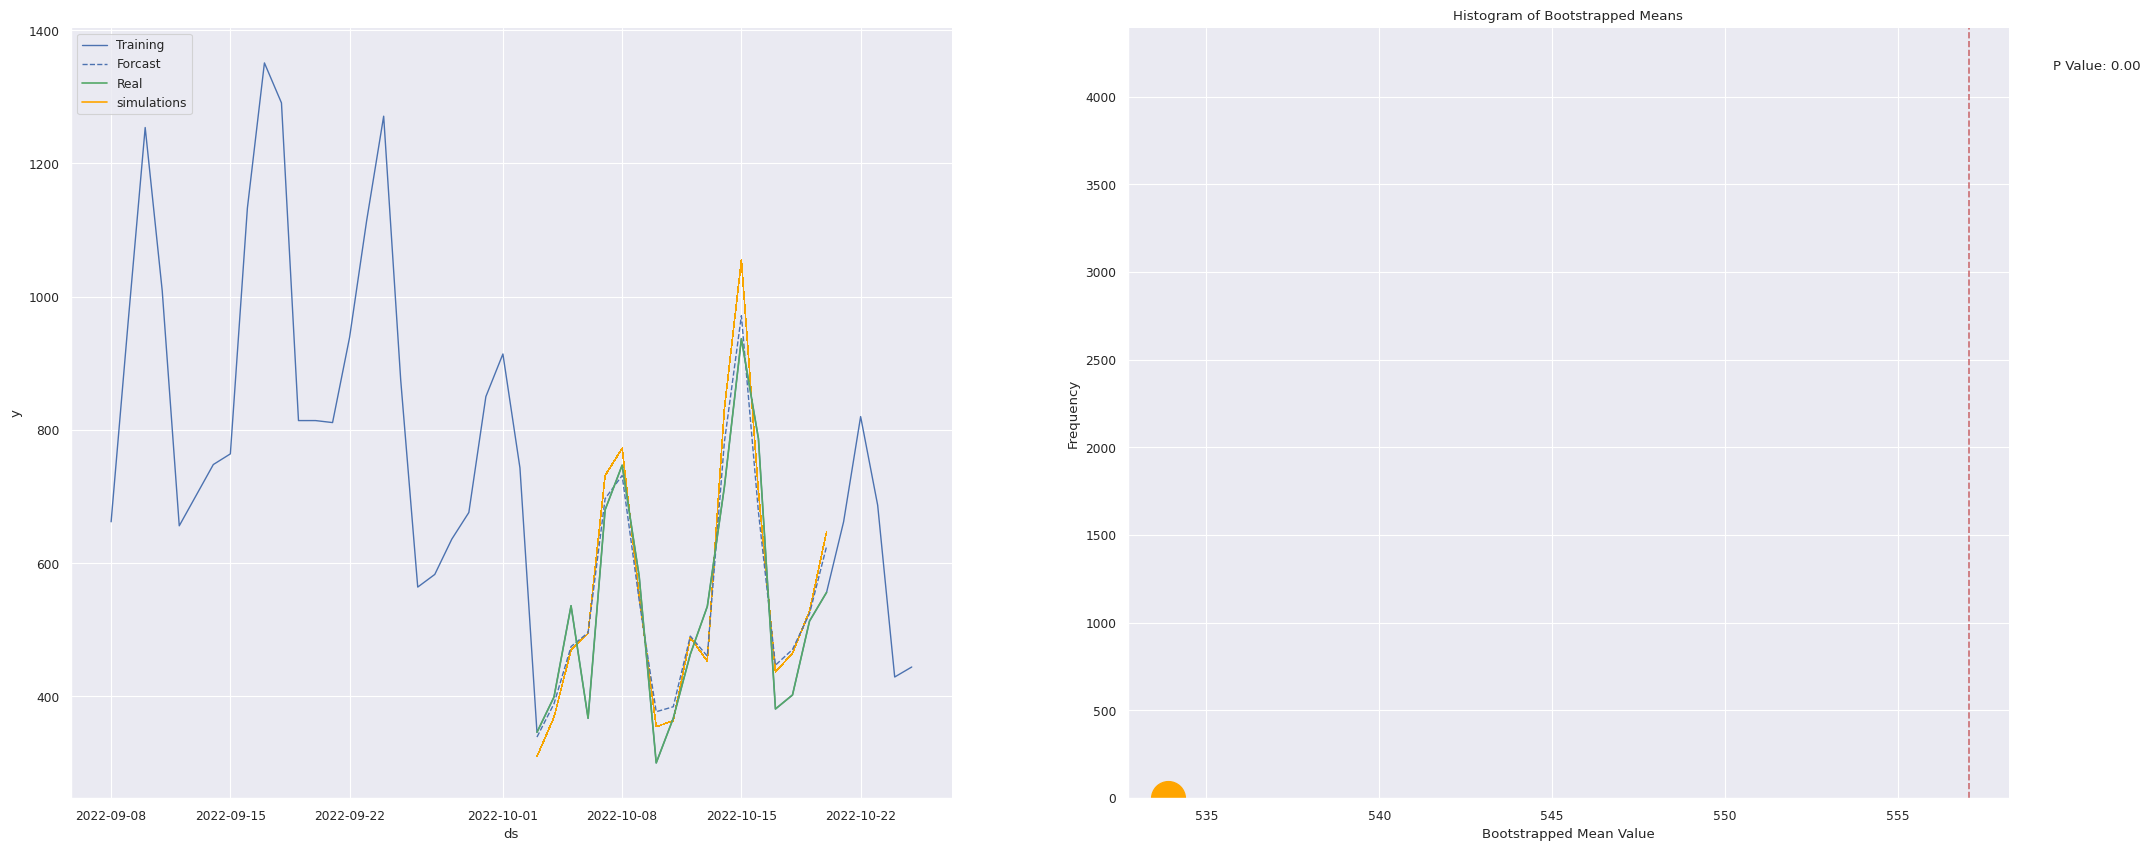

In [ ]:
model.plot(method = 'intervention', back_window = 30, past_window = 25)
model.plot(method = 'simulations', simulation_number = 500)